Source : 파이썬 머신러닝 완벽 가이드(권철민, 위키북스)

# Model Selection 모듈

## Train, Test Datasets Split

- **train_test_split( )** : 원본 데이터세트에서 학습 및 테스트 데이터세트를 분리  


- 입력 파라미터
1. feature datasets  
2. label datasets  
3. test_size : default=0.25, 전체 데이터셋에서 테스트 데이터셋의 크기를 얼마로 샘플링할 것인가를 결정함  
4. train_size : 전체 데이터셋에서 학습용 데이터셋의 크기를 얼마로 샘플링할 것인가를 결정함, 잘 사용하지 않음  
5. shuffle : default=True, 데이터를 분리하기 전에 데이터를 미리 섞을지를 결정함, 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용됨  
6. random_state : 호출할 때마다 동일한 학습/테스트용 데이터셋을 생성하기 위해 주어지는 난수 값, 수행할 때마다 동일한 학습/테스트용 데이터를 생성하려면 random_state를 일정한 숫자 값으로 부여함    


- 반환 값 : 튜플 형태, (학습용 데이터의 피처 데이터셋, 테스트용 데이터의 피처 데이터셋, 학습용 데이터의 레이블 데이터셋, 테스트용 데이터의 레이블 데이터셋)

In [2]:
#실습 : Iris Classification 참고

## Cross Validation(교차 검증)

- **Overfitting(과적합)** : 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것  

고정된 train 데이터와 test 데이터로 평가를 하다보면 test 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생기게 된다. 결국은 해당 test 데이터에만 Overfitting되는 학습 모델이 만들어져 다른 테스트용 데이터가 들어올 경우 성능이 저하된다.  

ML은 데이터에 기반한다. 데이터는 이상치, 분포도, 다양한 속성값, 피처 중요도 등 여러 가지 ML에 영향을 미치는 요소를 가지고 있다.  
특정 ML 알고리즘에서 최적으로 동작할 수 있도록 데이터를 선별해서 학습한다면 실제 데이터 양식과는 많은 차이가 생기게 되고, 결국 성능 저하로 이어질 것이다.  

Cross Validation(교차 검증)은 이러한 데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 train/test dataset에서 학습과 평가를 수행한다. 그리고 각 세트에서 수행한 평가 결과에 따라 Hyperparameter Tuning 등의 모델 최적화를 더욱 손쉽게 할 수 있다.

- **Cross Validation(교차 검증)**  

대부분의 ML 모델의 성능 평가는 교차 검증 기반으로 1차 평가를 한 뒤에 최종적으로 Test Dataset에 적용해 평가하는 프로세스이다.  
ML에 사용되는 Datasets를 세분화해서 Train, Validation, Test Dataset로 나눌 수 있다.  
Test Dataset 외에 별도의 Validation dataset를 둬서 최종 평가 이전에 학습된 모델을 다양하게 평가하는 데 사용한다.

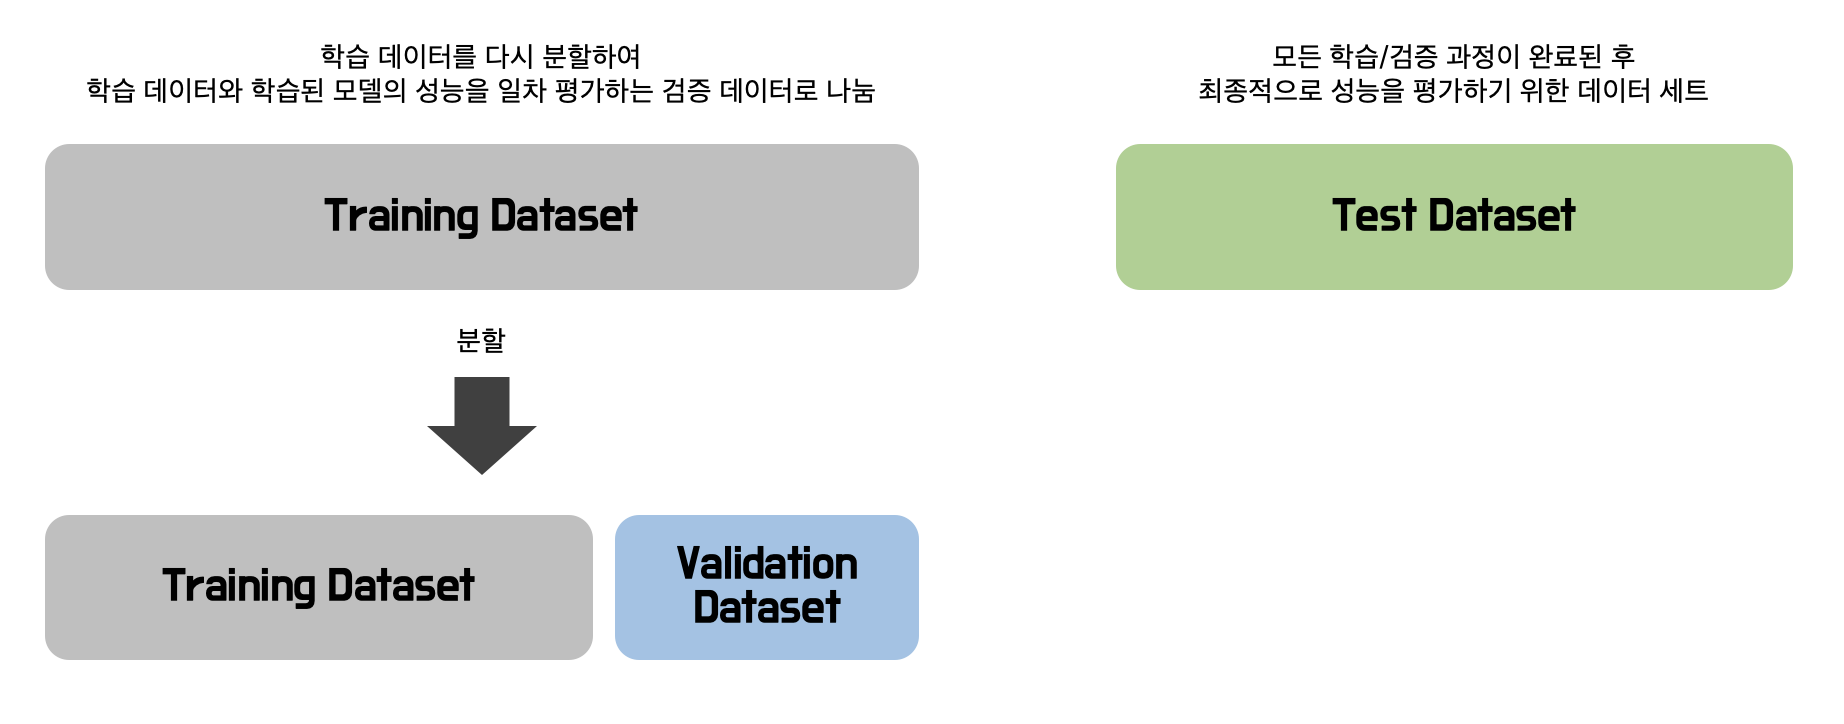

### K-Fold Cross Validation

- **K-Fold Cross Validation**  
K개의 data Fold 세트를 만들어서 K번만큼 각 Fold 세트에 학습과 검증 평가를 반복적으로 수행하는 방법  
K개의 폴드된 데이터 세트를 학습과 검증을 위한 데이터 세트로 변경하면서 K번 평가를 수행한 뒤, 이 K개의 예측 평가를 평균한 결과를 가지고 예측 성능을 평가한다.

**Example : Iris**

In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

In [13]:
#Iris Datasets 준비
iris = load_iris()
features = iris.data
label = iris.target
print('Iris 데이터세트 크기: ', features.shape[0])

#DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=156)

Iris 데이터세트 크기:  150


In [14]:
#5개의 Fold 세트로 분리하는 KFold 객체 생성
kfold = KFold(n_splits=5)

#폴드 세트별 정확도를 담을 list 객체 생성
cv_accuracy = []

KFold 객체의 split( )을 호출하면 학습용/검증용 데이터로 분할할 수 있는 인덱스를 반환한다.  
이렇게 반환된 인덱스를 기반으로 학습용/검증용 데이터를 직접 추출해야 한다.  
전체 Iris 데이터를 5개의 Fold Datasets로 분리하는데, 전체 데이터는 150개이므로 Training sets는 이 중 4/5인 120개, Validation sets는 1/5인 30개로 분할된다.

In [15]:
n_iter = 0

#KFold 객체의 split()을 호출하여 Fold별 학습용, 검증용 데이터의 row 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    #kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 데이터 추출하기
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    #반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    #training, test sets row 개수 
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    #split( )이 어떤 값을 반환하는지 확인하기 위해 검증 데이터 세트의 인덱스 추출해보기
    print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

#개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n##평균 검증 정확도: ', np.mean(cv_accuracy))


#1 교차 검증 정확도: 1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도: 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도: 0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도: 0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도: 0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

##평균 검증 정확도:  0.9


### Stratified K-Fold CV

- **Stratified K-Fold Cross Validation** : 불균형한(imbalanced) 데이터 분포도를 가진 label(결정 클래스) 데이터 집합을 위한 K-Fold 방식  

불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 경우이다.  

(예시) 대출 사기 데이터 예측하기  
대출 사기 여부를 뜻하는 label: 1(대출 사기), 0(정상 대출)  

대부분의 데이터는 정상 대출일 것이며, 전체 중 아주 작은 확률로 대출 사기 label이 존재한다.  
이렇게 작은 비율로 1인 label값이 있다면 K-Fold로 랜덤하게 학습 및 테스트 세트의 인덱스를 고르더라도 label값인 0과 1의 비율을 제대로 반영하지 못 하는 경우가 쉽게 발생한다.  
그런데 대출 사기 label이 1인 레코드는 비록 건수는 작지만 알고리즘이 대출 사기를 예측하기 위한 중요한 feature 값을 가지고 있기 때문에 매우 중요한 데이터 세트이다.  
따라서 원본 데이터와 유사한 대출 사기 레이블 값의 분포를 학습/테스트 세트에도 유지하는 게 매우 중요하다.  

**Stratified K-Fold는 원본 데이터의 label 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배한다.**

#### K-Fold CV의 문제점

In [31]:
#Iris 데이터세트를 DataFrame으로 생성하고 label 값의 분포도 확인하기

In [32]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [33]:
#3개의 Fold 세트로 KFold를 생성하고, 각 CV 시마다 생성되는 학습/검증 label 데이터 값의 분포도 확인하기

In [36]:
kfold = KFold(n_splits=3)

n_iter=0

for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('##{0} 교차 검증'.format(n_iter))
    print('학습 label 데이터 분포:\n', label_train.value_counts())
    print('검증 label 데이터 분포:\n', label_test.value_counts())

##1 교차 검증
학습 label 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 label 데이터 분포:
 0    50
Name: label, dtype: int64
##2 교차 검증
학습 label 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 label 데이터 분포:
 1    50
Name: label, dtype: int64
##3 교차 검증
학습 label 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 label 데이터 분포:
 2    50
Name: label, dtype: int64


K-Fold CV의 경우 교차 검증 시마다 3개의 Fold 세트로 만들어지는 학습 label과 검증 label이 완전히 다른 값으로 추출되었다.  
예를 들어, 첫 번째 교차 검증의 경우 학습 label의 1, 2 값이 각각 50개가 추출되었고, 검증 label의 0값이 50개가 추출되었는데, 학습 label은 1, 2 밖에 없으므로 0의 경우는 전혀 학습하지 못한다. 반대로 검증 label은 0밖에 없으므로 학습 모델은 절대 0을 예측하지 못한다. 결국 검증 예측 정확도는 0이 될 수 밖에 없다.

#### Stratified K-Fold CV로 분할된 label 데이터 세트가 전체 label 값의 분포도를 반영하도록 문제 해결하기

**Stratified K-Fold는 label 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에 split( ) 메서드에 인자로 feature뿐만 아니라 label 데이터셋도 반드시 필요하다.**

In [38]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)

n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('##{0} 교차 검증: '.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

##1 교차 검증: 
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
##2 교차 검증: 
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
##3 교차 검증: 
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


학습 label과 검증 label 데이터 값의 분포도가 동일하게 할당됐다.  
예를 들어 첫 번째 교차 검증의 경우 학습 label은 2, 0, 1 값이 각각 34, 33, 33개로 레이블별로 동일하게 할당됐고, 검증 label 역시 0, 1, 2 값이 각각 17, 17, 16개로 레이블별로 동일하게 할당됐다.  
이렇게 분할이 되어야 레이블 값 0, 1, 2를 모두 학습할 수 있고, 이에 기반해 검증을 수행할 수 있다.

#### Stratified K-Fold를 이용한 Iris 데이터 Cross Validation

In [39]:
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

In [44]:
#Iris DataFrame
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
features = iris.data
label = iris.target

#DecisionTreeClassifier 객체 만들기
clf = DecisionTreeClassifier(random_state=156)

#Stratified K-Fold CV
n_iter = 0
cv_accuracy = []
skfold = StratifiedKFold(n_splits=3)

for train_index, test_index in skfold.split(features, label):
    n_iter += 1
    #split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #DecisionTreeClassifier로 학습 및 예측하기
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    #반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('\n#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

#교차 검증별 정확도 및 평균 정확도 계산
print('\n##교차 검증별 정확도: ', np.round(cv_accuracy, 4))
print('\n##평균 검증 정확도: ', np.mean(cv_accuracy))


#1 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50

#1 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도: 0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50

#2 검증 세트 인덱스: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50

#3 검증 세트 인덱스: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

##교차 검증별 정확도:  [0.98 0.94 0.98]

##평균 검증 정확도:  0.9666666666666667


왜곡된 label 데이터 세트에서는 반드시 Stratified K-Fold Cross Validation을 해야 한다.  
일반적으로 Classification(분류)에서의 교차 검증은 Stratified K-Fold로 분할돼야 한다.  
Regression(회귀)에서는 결정값이 이산값 형태의 label이 아니라 연속된 숫자값이기 때문에 결정값별로 분포를 정하는 의미가 없어서 Stratified K-Fold가 지원되지 않는다.  

### cross_val_score( ) : CV를 보다 간편하게

- K-Fold로 데이터를 학습하고 예측하는 프로세스  
1. Fold 세트를 설정한다.  
2. for loop에서 반복적으로 학습 및 검증 데이터의 인덱스를 추출한다.  
3. 반복적으로 학습과 예측을 수행하고 예측 성능을 반환한다.

- **cross_val_score( )**는 이런 일련의 과정을 한꺼번에 수행해주는 API  


- **cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')**  
이 중에서 estimator, X, y, scoring, cv가 주요 파라미터  
1. estimator : scikit-learn의 supervised learning 알고리즘 클래스인 Classifier 또는 Regressor를 의미  
2. X : Feature datasets  
3. y : Label datasets  
4. scoring : 예측 성능 평가 지표  
5. cv : 교차 검증 폴드 수  

cross_val_score( ) 수행 후 반환 값은 scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환  
Classifier가 입력되면 Stratified K-Fold 방식으로 label값의 분포에 따라 학습/테스트 세트를 분할하며, Regressor의 경우 K-Fold 방식으로 분할함

In [45]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
import numpy as np

#Iris 데이터 준비
iris = load_iris()

#DecisionTreeClassifier 객체 생성
clf = DecisionTreeClassifier(random_state=156)

features = iris.data
label = iris.target

#성능 지표는 accuracy(정확도), 교차 검증 세트는 3개
scores = cross_val_score(clf, features, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도: ', np.round(scores, 4))
print('평균 검증 정확도: ', np.mean(scores))

교차 검증별 정확도:  [0.98 0.94 0.98]
평균 검증 정확도:  0.9666666666666667


### cross_validate( )

- **cross_validate( )**  
여러 개의 평가 지표를 반환할 수 있음  
학습 데이터에 대한 성능 평가 지표와 수행 시간도 같이 제공함  
실습 생략